# K-Means - Exercícios

Repositório original com conteúdo teórico:  
https://github.com/silvaan/unsupervised-learning/blob/main/02%20-%20K-Means.ipynb

In [ ]:
# Célula de importação de bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from sklearn.datasets import load_wine

# Estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

## Exercícios

Neste exercício, você usará a classe `KMeans` que construímos para explorar um novo dataset e descobrir seus agrupamentos naturais.

O dataset escolhido é o **"Wine dataset"**, que contém a análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares (tipos de uva) diferentes. O objetivo é ver se o K-Means consegue agrupar os vinhos de acordo com seu cultivar, usando apenas as suas características químicas.

### Tarefa 1: Análise e Seleção de Features

Primeiro, carregue o dataset `wine` e use a função `seaborn.pairplot` para visualizar as relações entre as features. Analise o gráfico e escolha o par de features que você acredita que melhor separa os 3 grupos. Plote um gráfico de dispersão apenas com o par selecionado.

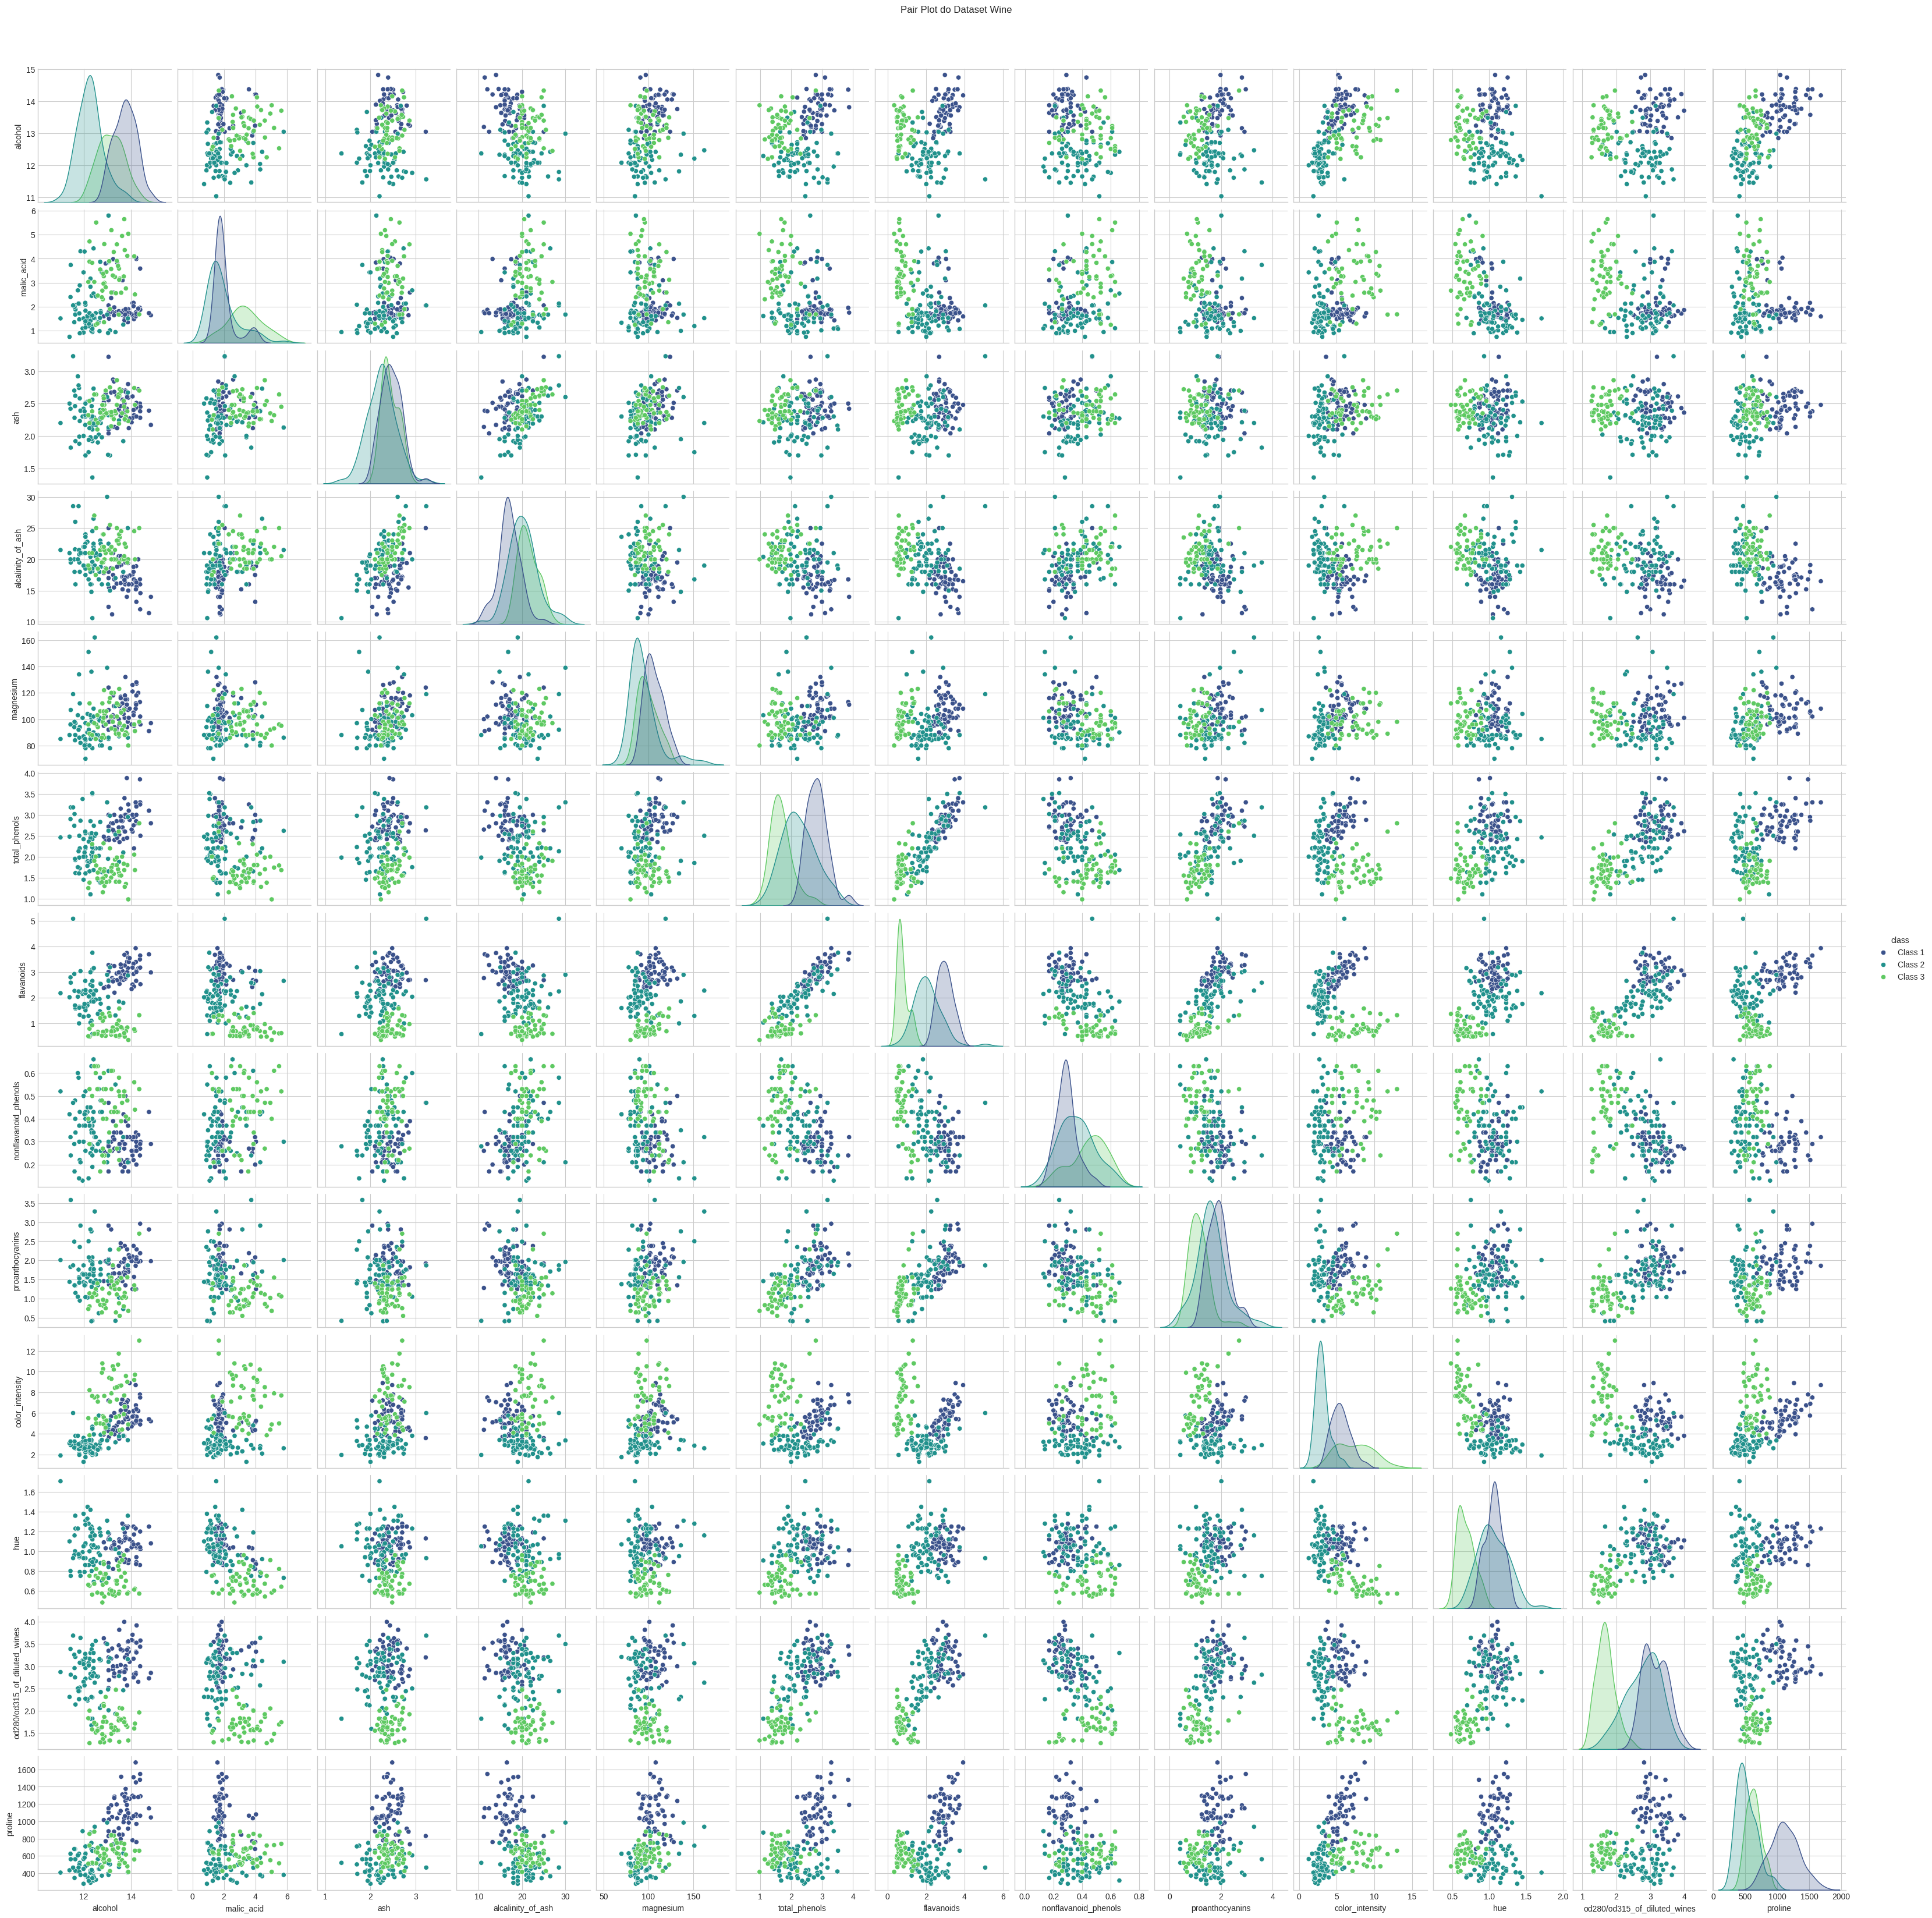

In [ ]:
wine = load_wine()
x = wine.data
y_true = wine.target

wine_df = pd.DataFrame(x, columns=wine.feature_names)
wine_df['class'] = pd.Series(wine.target).map({0: "Class 1", 1: "Class 2", 2: "Class 3"}
                                              )
sns.pairplot(wine_df, hue="class", palette="viridis", diag_kind="kde")
plt.suptitle("Pair Plot do Dataset Wine", y=1.02)
plt.show()

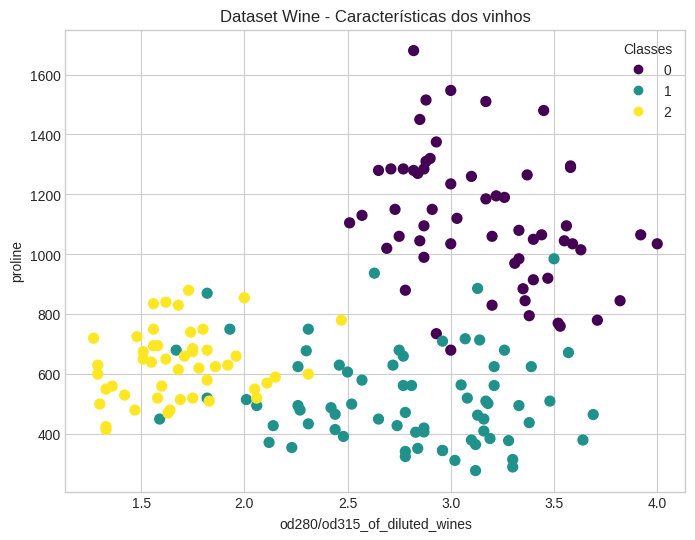

In [ ]:
# od280/od315_of_diluted_wines Eixo X
# proline Eixo Y

wine = load_wine()
x = wine.data
y_true = wine.target

# Par selecionado:
# OD280/OD315 of diluted wines e Proline
x = x[:, 11:13]

# Visualizar os dados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x[:, 0], x[:, 1], c=y_true, cmap='viridis', marker='o', s=50)
plt.xlabel(wine.feature_names[11])
plt.ylabel(wine.feature_names[12])
plt.title('Dataset Wine - Características dos vinhos')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Classes")

plt.show()

### Tarefa 2: Encontrando o K Ótimo

Aplique o Método do Cotovelo nas duas features que você escolheu. Calcule e plote a inércia (WCSS) para K de 1 a 10. Com base no seu gráfico, qual parece ser o número ideal de clusters?

In [ ]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """
        Inicializa os centróides selecionando K pontos aleatórios do dataset.
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

    def _assign_clusters(self, X):
        """
        Atribui cada ponto de dado ao centróide mais próximo.
        """
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.n_clusters))

        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.sum((X - centroid)**2, axis=1)

        self.labels = np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        """
        Atualiza a posição de cada centróide com base na média dos pontos atribuídos a ele.
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = self.centroids[i]

        self.centroids = new_centroids

    def fit(self, X):
        """
        Executa o algoritmo K-Means.
        """
        self._initialize_centroids(X)

        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self._assign_clusters(X)
            self._update_centroids(X)
            if np.allclose(old_centroids, self.centroids):
                break

    def predict(self, X):
        """
        Atribui clusters para novos dados com base nos centróides aprendidos.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.sum((X - centroid)**2, axis=1)

        return np.argmin(distances, axis=1)

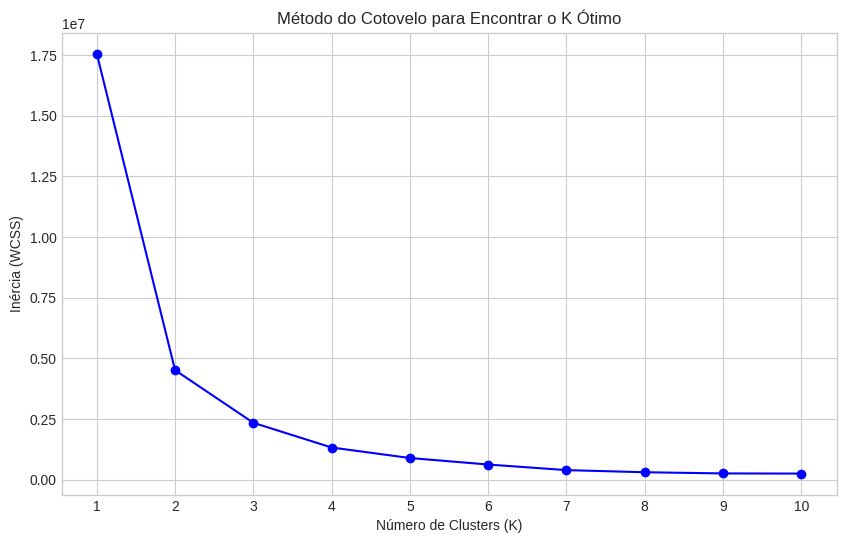

In [ ]:
k_range = range(1, 11)
inertias = []
clustering_results = []

for k in k_range:
  model = KMeans(n_clusters = k, max_iter = 150)
  model.fit(x)

  current_inertia = 0
  for i in range(k):
    cluster_points = x[model.labels == i]
    current_inertia += np.sum((cluster_points - model.centroids[i])**2)

  inertias.append(current_inertia)
  clustering_results.append({'labels': model.labels, 'centroids': model.centroids})

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.title('Método do Cotovelo para Encontrar o K Ótimo')
plt.xticks(k_range)
plt.grid(True)
plt.show()

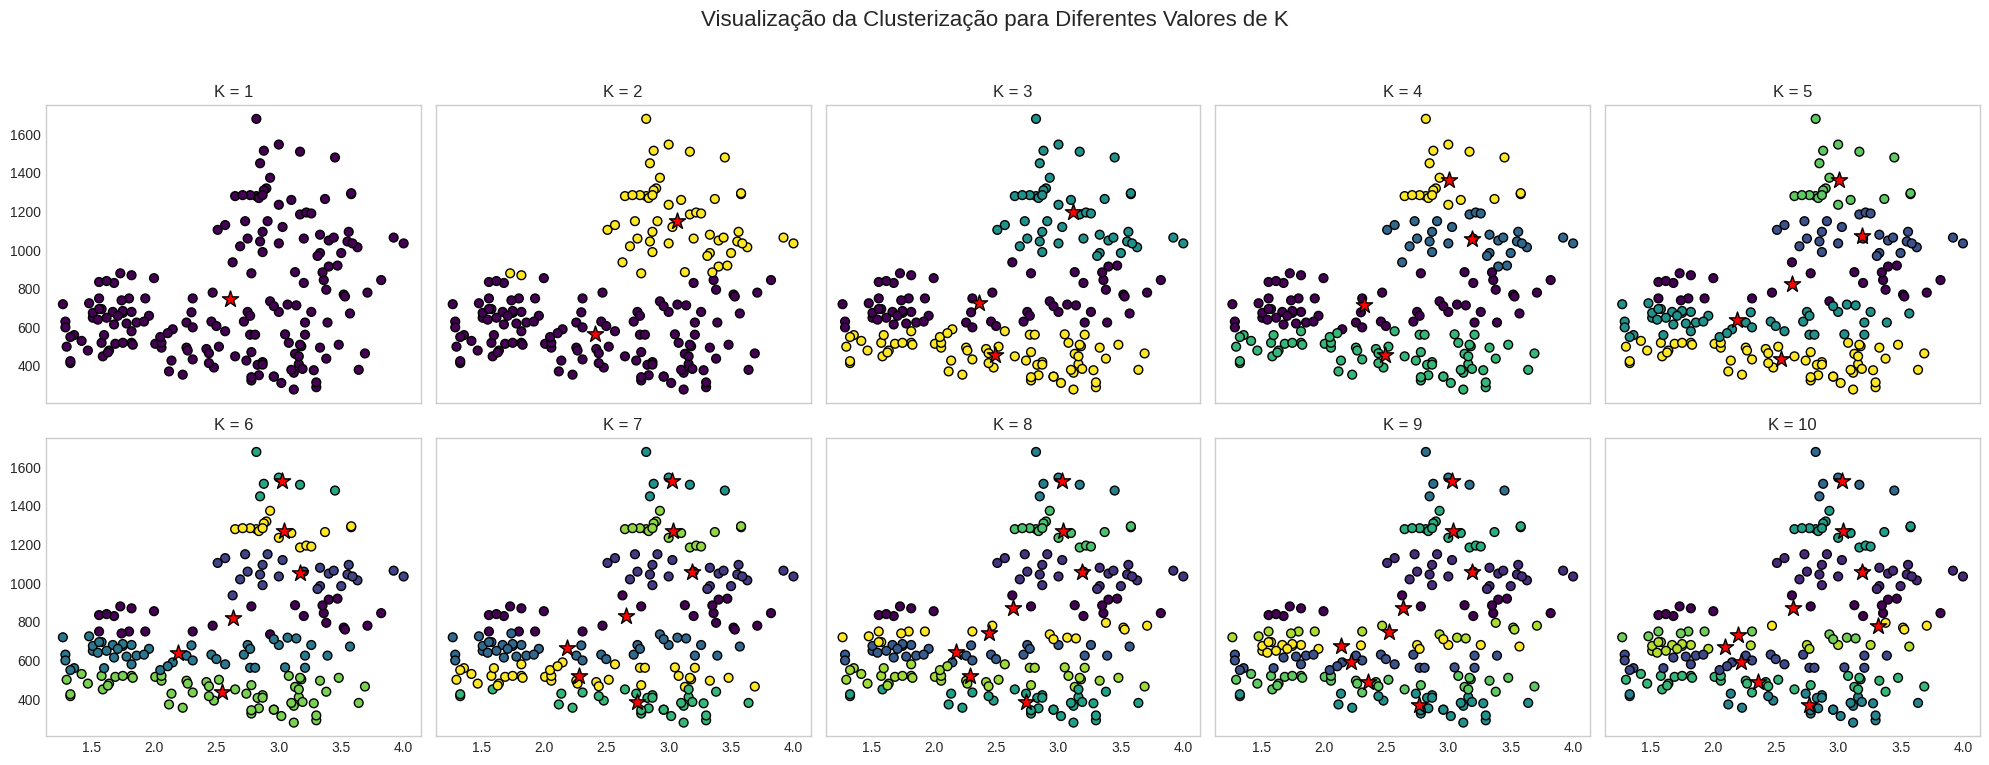

In [ ]:
# Plotar os resultados da clusterização para cada K
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, k in enumerate(k_range):
    result = clustering_results[i]
    labels = result['labels']
    centroids = result['centroids']

    axes[i].scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis', edgecolor='k')
    axes[i].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, c='red', edgecolor='black')
    axes[i].set_title(f'K = {k}')
    axes[i].grid(False)

plt.suptitle('Visualização da Clusterização para Diferentes Valores de K', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Com base nos gráficos, o número ideal de cluster parece ser 3 ou 4, que são os últimos que apresentam diferenças significativas em relação aos valores anteriores.

### Tarefa 3: Clusterização e Avaliação

Use o K encontrado na tarefa anterior para treinar seu modelo `KMeans`. Crie um gráfico com dois subplots: um mostrando os clusters encontrados pelo algoritmo e outro mostrando os dados com os rótulos reais para comparação. Por fim, calcule a taxa de acertos e comente o resultado.

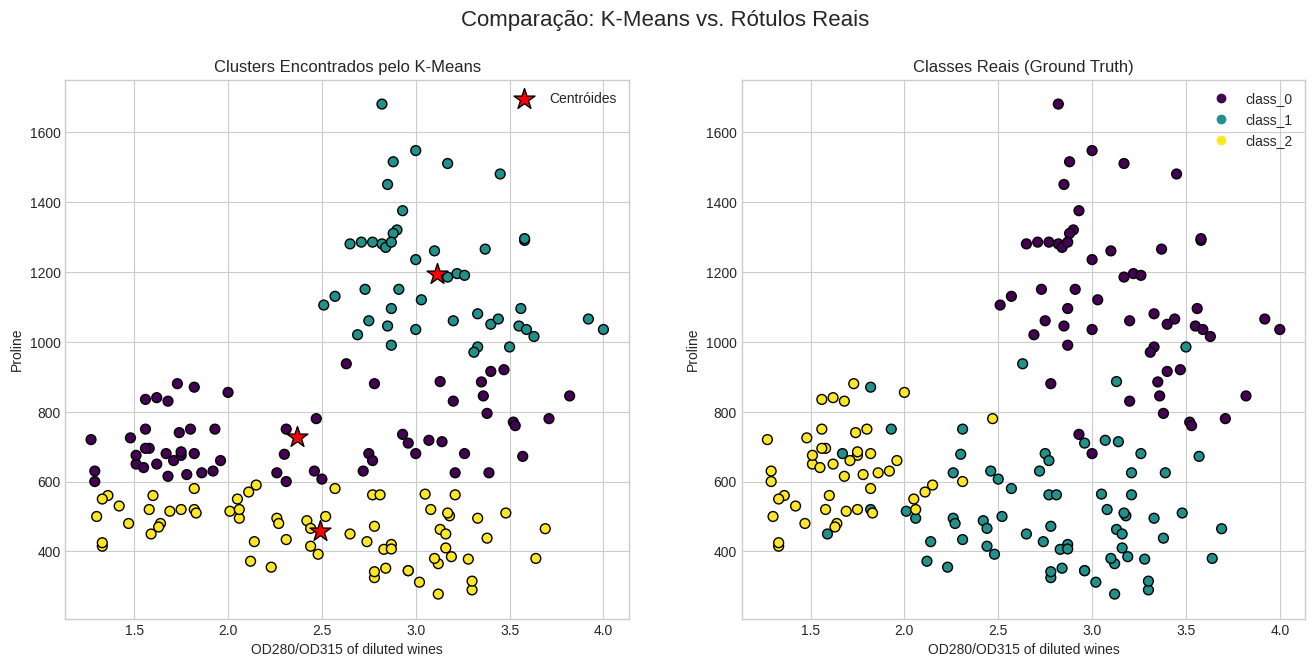


Número de acertos: 125 de 178 pontos.
Taxa de acerto: 70.22%


In [ ]:
# Considerando k = 3
kmeans = KMeans(n_clusters = 3, max_iter = 150)
kmeans.fit(x)

final_centroids = kmeans.centroids
predicted_labels = kmeans.labels

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].scatter(x[:, 0], x[:, 1], c=predicted_labels, s=50, cmap='viridis', edgecolor='k')
axes[0].scatter(final_centroids[:, 0], final_centroids[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centróides')
axes[0].set_title('Clusters Encontrados pelo K-Means')
axes[0].set_xlabel('OD280/OD315 of diluted wines')
axes[0].set_ylabel('Proline')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Classes Reais do Dataset
scatter = axes[1].scatter(x[:, 0], x[:, 1], c=y_true, s=50, cmap='viridis', edgecolor='k')
axes[1].set_title('Classes Reais (Ground Truth)')
axes[1].set_xlabel('OD280/OD315 of diluted wines')
axes[1].set_ylabel('Proline')
axes[1].legend(handles=scatter.legend_elements()[0], labels=wine.target_names.tolist())
axes[1].grid(True)

plt.suptitle('Comparação: K-Means vs. Rótulos Reais', fontsize=16)
plt.show()

correct_predictions = 0
n_samples = x.shape[0]

for i in range(kmeans.n_clusters):
    mask = (predicted_labels == i)

    dominant_label = mode(y_true[mask], keepdims=True)[0][0]

    hits = np.sum(y_true[mask] == dominant_label)

    correct_predictions += hits

print(f"\nNúmero de acertos: {correct_predictions} de {n_samples} pontos.")
print(f"Taxa de acerto: {(correct_predictions / n_samples):.2%}")